In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os
from scipy.ndimage import gaussian_filter
import time

# Import the MFI library 
import MFI_lib2D as lib2
import MFI_class2D

# Set the path to the notebook and the data folder (and figures folder if needed)
if 'path_notebook' not in globals(): path_notebook = os.getcwd()
print("The path to the notebook is:", path_notebook)

if 'path_data' not in globals():
    if not os.path.isdir("_data_PRTR"): print("\nThe data folder \"_data_PRTR\" does not exist. Creating new folder."); os.mkdir(path_notebook + "/_data_PRTR/"); 
    path_data = path_notebook + "/_data_PRTR/"
print("The data folder is:", path_data)
# path_figures = "/home/ucecabj/Pictures/MFI_figures/"

# Set the plotting parameters
for _plt_parameters_ in [0]:
    from matplotlib import rc
    plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["Helvetica"], "font.size": 12, "axes.titleweight": "bold"})
    plw = 0.6  # width of (box line, tick line, ...)
    plt.rcParams.update({"axes.linewidth": plw, "figure.figsize": (4,3)}) 
    plt.rcParams.update({"xtick.top": True, "xtick.direction": "in", "xtick.major.width": plw, "xtick.minor.width": plw, "xtick.minor.visible": True, "xtick.major.size": 5})
    plt.rcParams.update({"ytick.right": True, "ytick.direction": "in", "ytick.major.width": plw, "ytick.minor.width": plw, "ytick.minor.visible": True, "ytick.major.size": 5})

t_compare, aofe_compare, _, aad_compare, _ = lib2.load_pkl(path_notebook + f"/error_progressions/error_progression_long_inve.pkl")


The path to the notebook is: /home/ucecabj/Desktop/MFI_git/MFI_class2D
The data folder is: /home/ucecabj/Desktop/MFI_git/MFI_class2D/_data_PRTR/


In [3]:
os.chdir(path_notebook); reload(MFI_class2D); reload(lib2); pass

## Invernizzi Potential

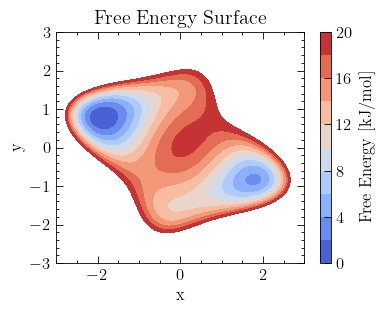

In [2]:
# Define the grid, the potential, the string of the potential and the FES cutoff
grid = np.linspace(-3, 3, 100); 
X, Y = np.meshgrid(grid, grid)
inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = inve_pot - np.min(inve_pot)
inve_pot_string = "1.34549*x^4+1.90211*x^3*y+3.92705*x^2*y^2-6.44246*x^2-1.90211*x*y^3+5.58721*x*y+1.33481*x+1.34549*y^4-5.55754*y^2+0.904586*y+18.5598"
plumed_dat_text = f"p: DISTANCE ATOMS=1,2 COMPONENTS\nff: MATHEVAL ARG=p.x,p.y FUNC=({inve_pot_string}) PERIODIC=NO\nbb: BIASVALUE ARG=ff\n"
FES_cutoff = 20

# Define plumed grid
[plX, plY, pl_min, pl_max, pl_n, pl_extra] = lib2.get_plumed_grid_2D(X, Y, [-4,-4], [4,4])

# plot the free energy surface
plt.contourf(X, Y, inve_pot, levels=np.linspace(0, FES_cutoff, 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Free Energy Surface"); plt.show()

# Stimulation path
path_invernizzi = path_data + "Invernizzi_Potential/"

### MFI2D run PRTR

In [4]:
# default parameters for the MFI class
default_params = {  "X":X, "Y":Y, "Z":inve_pot, 
                    "bw":[0.1, 0.1], "System":"Langevin", "plumed_dat_text":plumed_dat_text, 
                    "position_pace":50, "n_pos_per_window":10, "metad_pace":500, "Bias_sf":0.95, "gaus_filter_sigma":1, 
                    "FES_cutoff":FES_cutoff, "calculate_FES_st_dev":True, "bootstrap_iter":30,
                    "simulation_folder_path": path_invernizzi, "save_mfi_instance":True, "save_results":True, "save_force_terms":True, "save_error_progression":True,
                    }

S 1  START in exploration phase | MetaD_H=6.63 | MetaD_W=[0.096 0.096] | BF=20 | Startup: 0.13 sec
S 2  START in exploration phase | MetaD_H=6.63 | MetaD_W=[0.12 0.12] | BF=20 | Startup: 0.27 sec
S 3  START in exploration phase | MetaD_H=6.63 | MetaD_W=[0.144 0.144] | BF=20 | Startup: 0.27 sec
    S 1 | t= 0.30ns | nPos: 1200/ 1200: Aofe: 9.06 | AAD: 2.45 | Aofe_all: 9.06  |  AAD_all: 2.45 | ABS_all: nan | 
    S 2 | t= 0.30ns | nPos: 1200/ 1200: Aofe: 8.96 | AAD: 2.23 | Aofe_all: 7.17  |  AAD_all: 2.45 | ABS_all: nan | 
    S 3 | t= 0.25ns | nPos: 1000/ 1000: Aofe: 8.03 | AAD: 3.30 | Aofe_all: 5.88  |  AAD_all: 3.27 | ABS_all: 1.03 | 
ALL | t= 0.85ns :   ->->->-> Memory: 31.63 MB

    S 1 | t= 0.60ns | nPos: 1200/ 2400: Aofe: 6.65 | AAD: 2.32 | Aofe_all: 5.16  |  AAD_all: 3.13 | ABS_all: 0.87 | 
    S 2 | t= 0.70ns | nPos: 1600/ 2800: Aofe: 5.25 | AAD: 1.27 | Aofe_all: 4.24  |  AAD_all: 2.07 | ABS_all: 0.91 | 
    S 3 | t= 0.75ns | nPos: 2000/ 3000: Aofe: 4.61 | AAD: 1.44 | Aofe_all: 

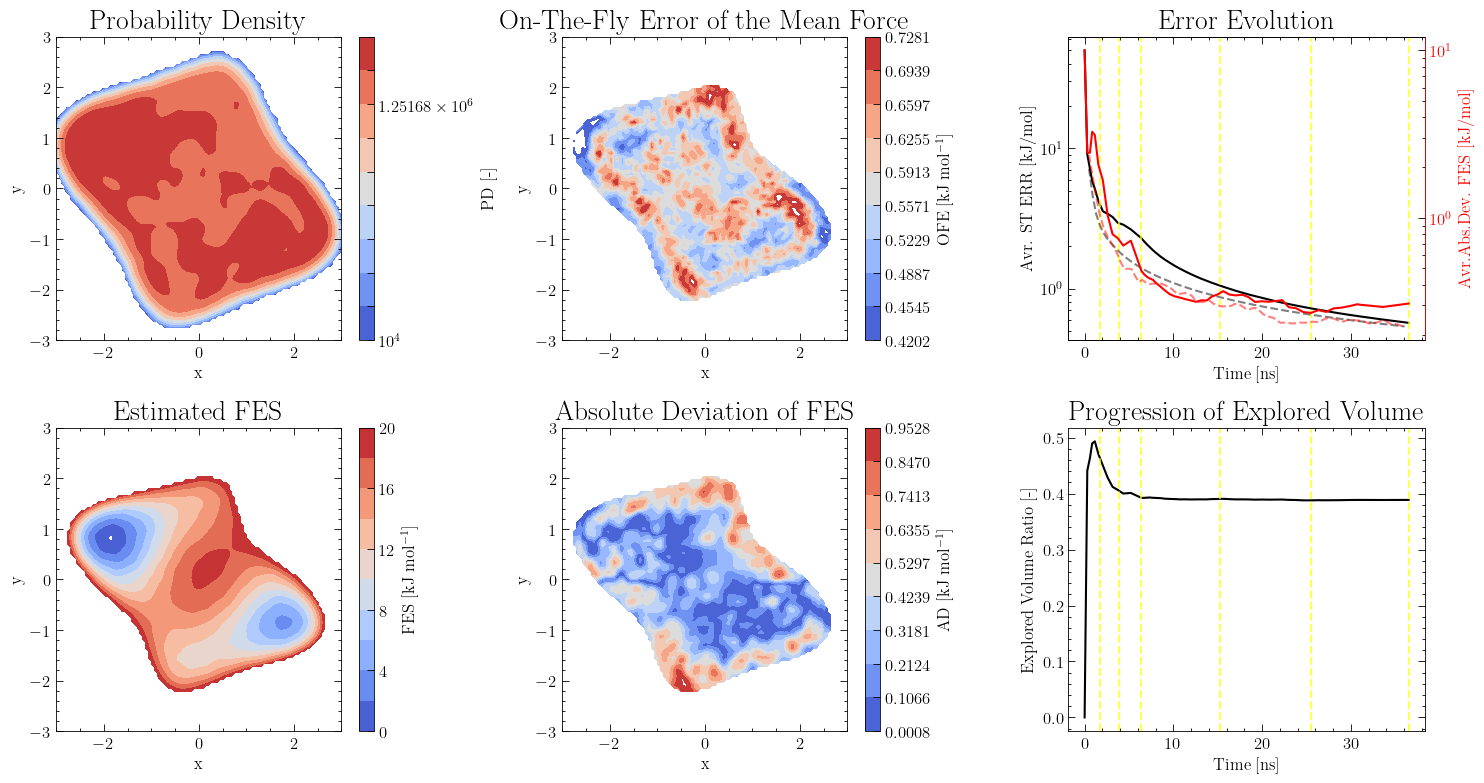

In [5]:
MFI = MFI_class2D.MFI2D(**default_params.copy())

mfi_PRTR = MFI.MFI_parallel_RTR(parent=MFI, ID="_test", workers=3, goal=0.15, main_error_type="ST_ERR", n_pos_before_analysis=1000, guaranteed_sim_time=5.0, max_sim_time=10.0, #save_comp_cost=True, 
                                time_budget=30.0)
                                # restart_PRTR=True, time_budget=60.0)

mfi_PRTR.run()

mfi_PRTR.sim[0].plot_results(t_compare=t_compare, aofe_compare=aofe_compare, aad_compare=aad_compare)

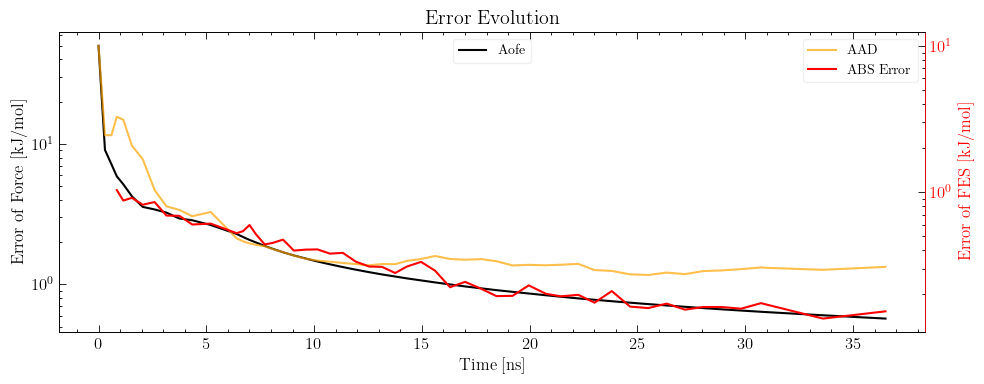

In [6]:
mfi_PRTR.sim[0].plot_errors()

In [ ]:
### Reload an existing mfi_PRTR instance
# mfi_reload = MFI_class2D.load_instance(path_invernizzi+"PRTRcampaign/MFI_instance.pkl")
# mfi_reload.sim[0].plot_results()

### Plot more error progressions

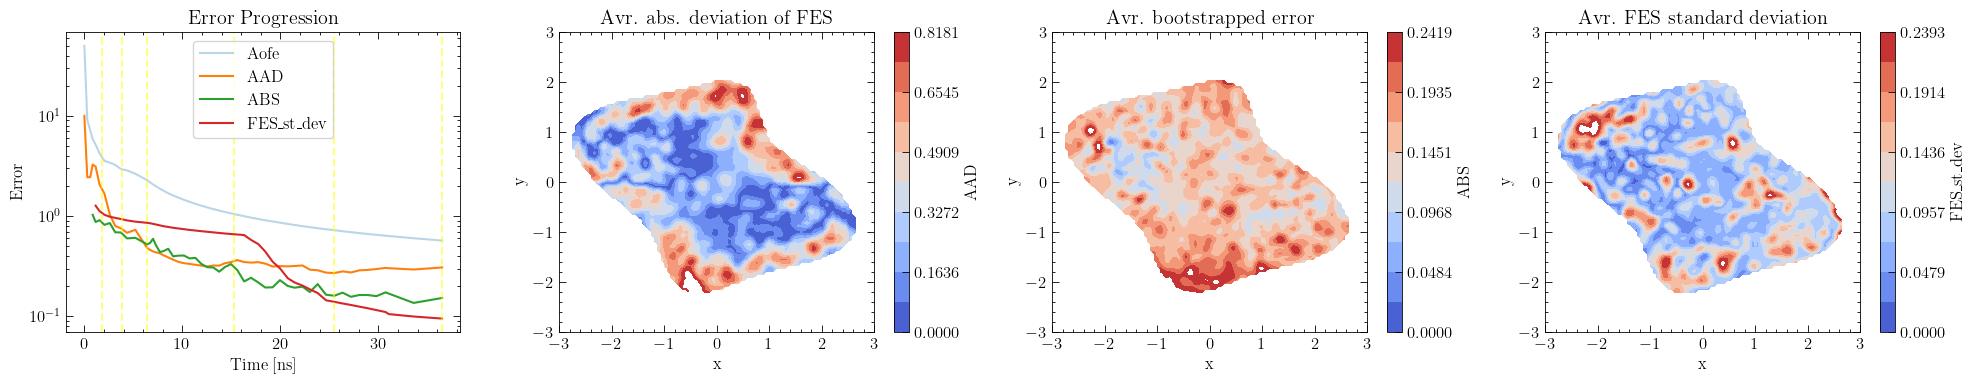

In [7]:
### Plot different error progreesions and maps    
lib2.plot_multiple_error_prog_and_maps(mfi_PRTR.sim[0], error_types=["AAD", "ABS", "FES_st_dev"])

Block size 1: sd_fes = 0.2093,  length=40
Block size 3: sd_fes = 0.2371,  length=14
Block size 5: sd_fes = 0.2325,  length=8


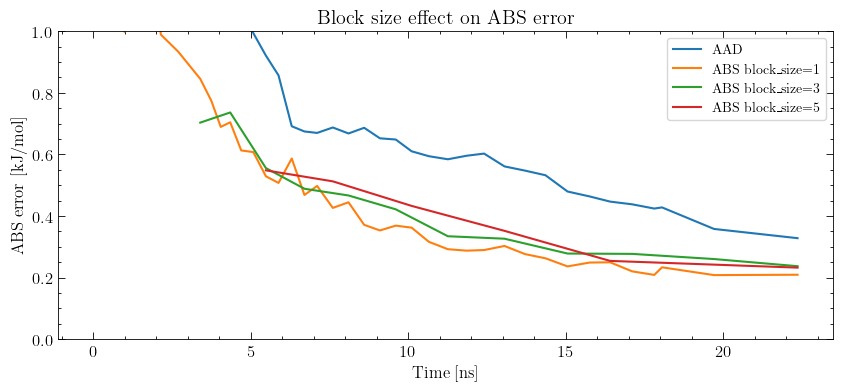

In [ ]:
### bootstrap error with increasing BLOCK SIZE
n_bootstrap = 100
plt.figure(figsize=(10,4))
plt.plot(mfi_PRTR.sim[0].Avr_Error_list[:,0], mfi_PRTR.sim[0].Avr_Error_list[:,mfi_PRTR.sim[0].aad_index], label="AAD")

for block_size in [1, 3, 5]:#10]:
    _, _, _, sd_fes_evo_bs, time_bs = lib2.bootstrapping_progression(X,Y,mfi_PRTR.sim[0].forces_e_list, time_array=mfi_PRTR.sim[0].Avr_Error_list[:,0], n_bootstrap=n_bootstrap, block_size=block_size, periodic=mfi_PRTR.sim[0].periodic, FES_cutoff=mfi_PRTR.sim[0].FES_cutoff)
    print(f"Block size {block_size}: sd_fes = {sd_fes_evo_bs[-1]:.4f},  length={len(sd_fes_evo_bs)}")
    plt.plot(time_bs, sd_fes_evo_bs, label=f"ABS block_size={block_size}")

plt.ylim(0, 1); plt.title("Block size effect on ABS error"); plt.xlabel("Time [ns]"); plt.ylabel("ABS error [kJ/mol]"); plt.legend(fontsize=10); plt.show()

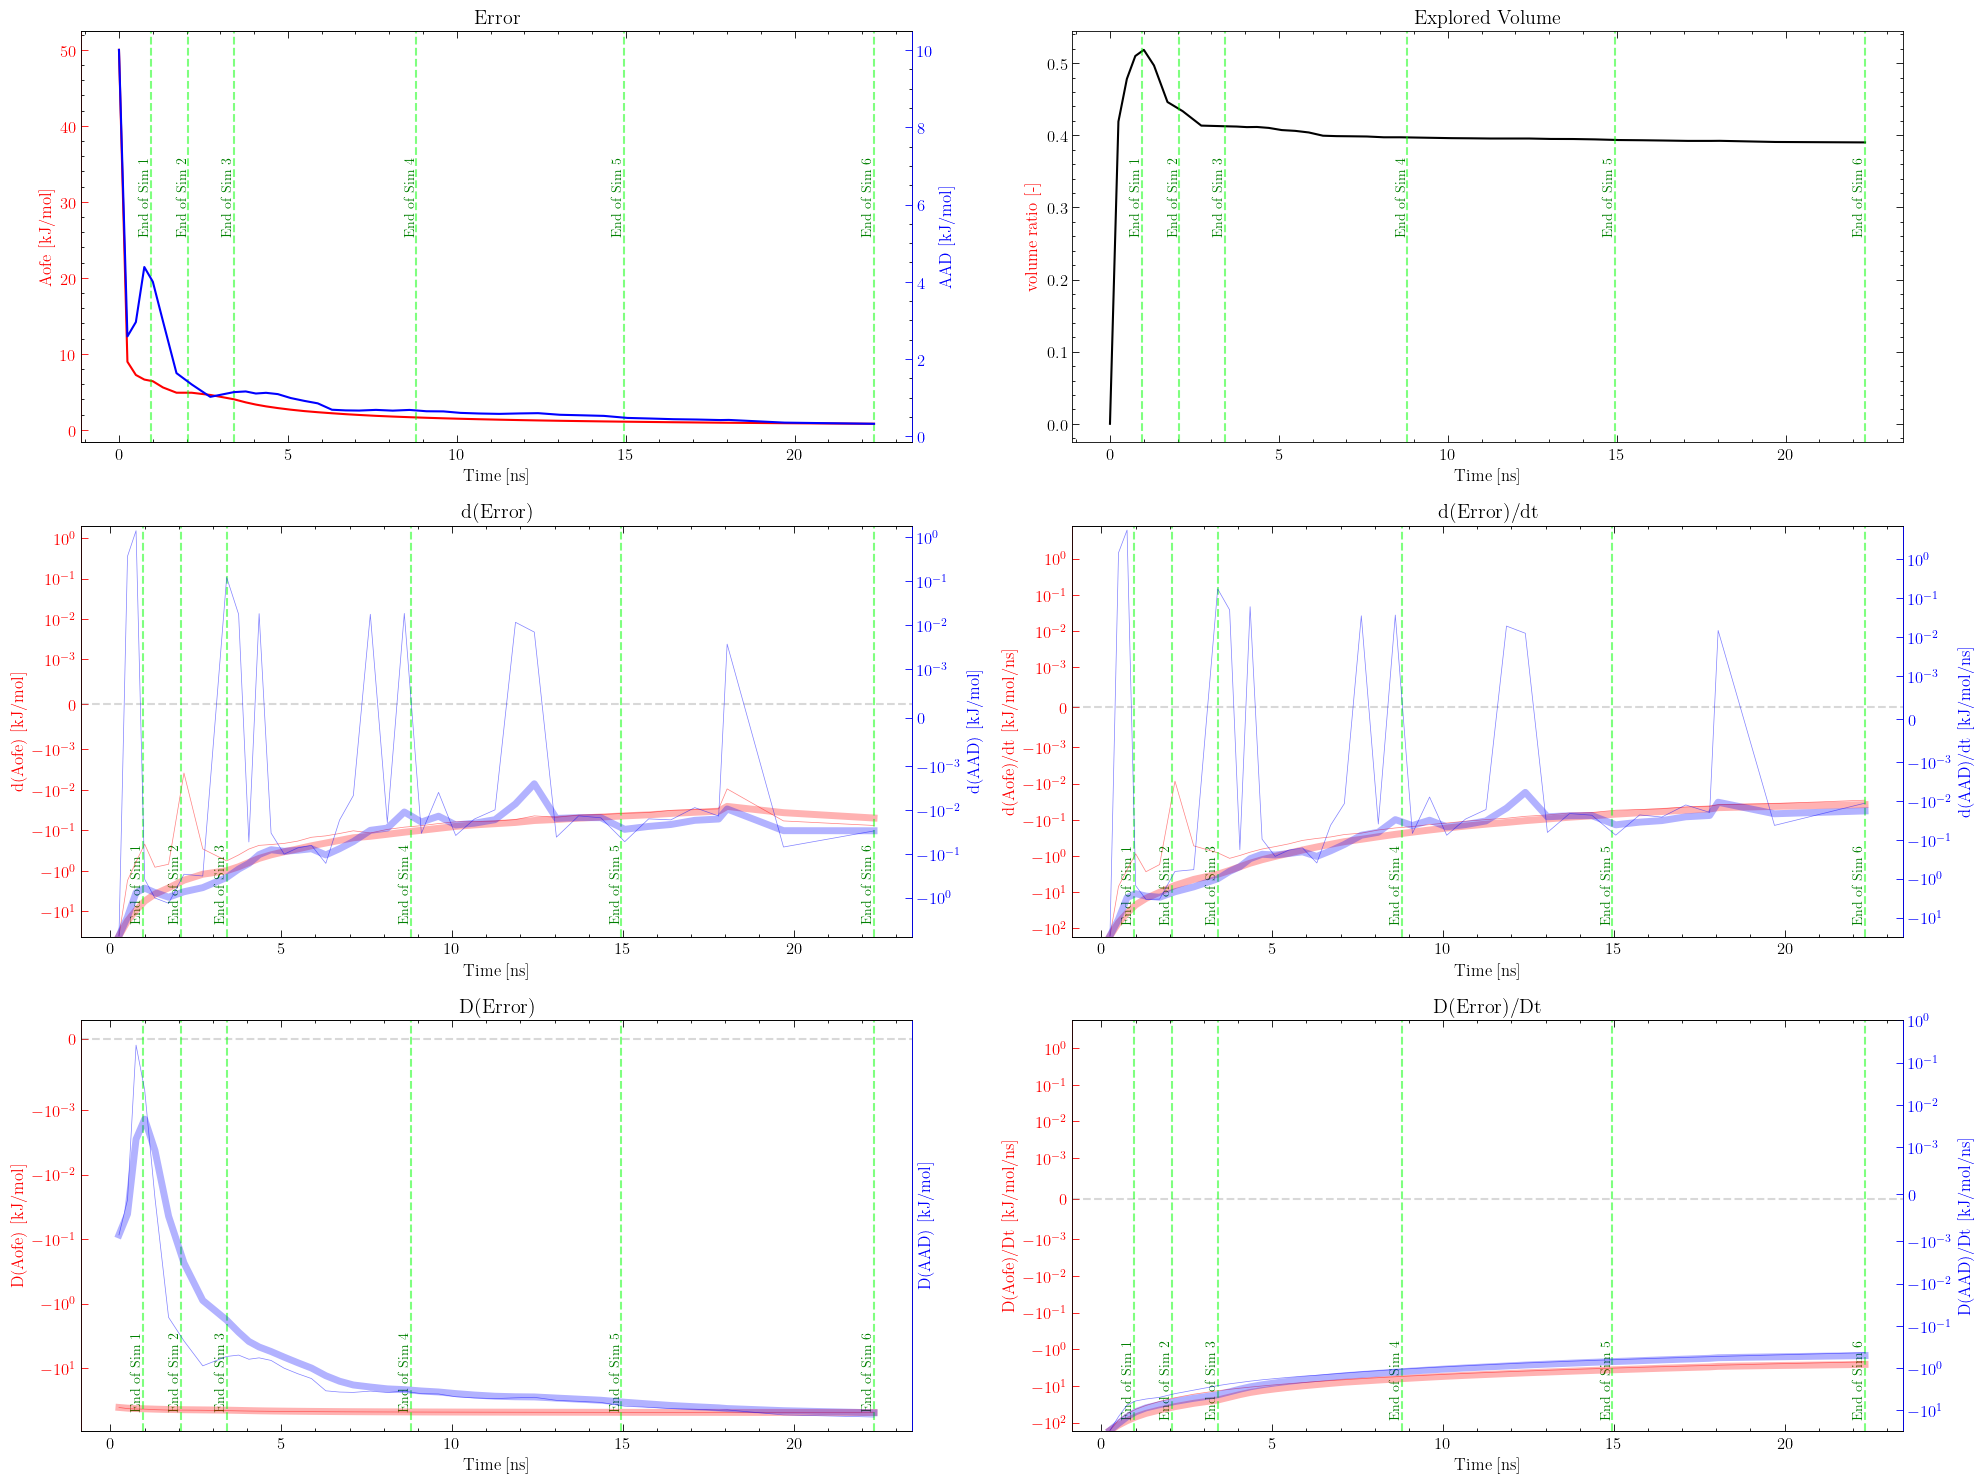

In [ ]:
#plot all Error progression    
lib2.plot_all_change_in_error(mfi_PRTR.sim[0])

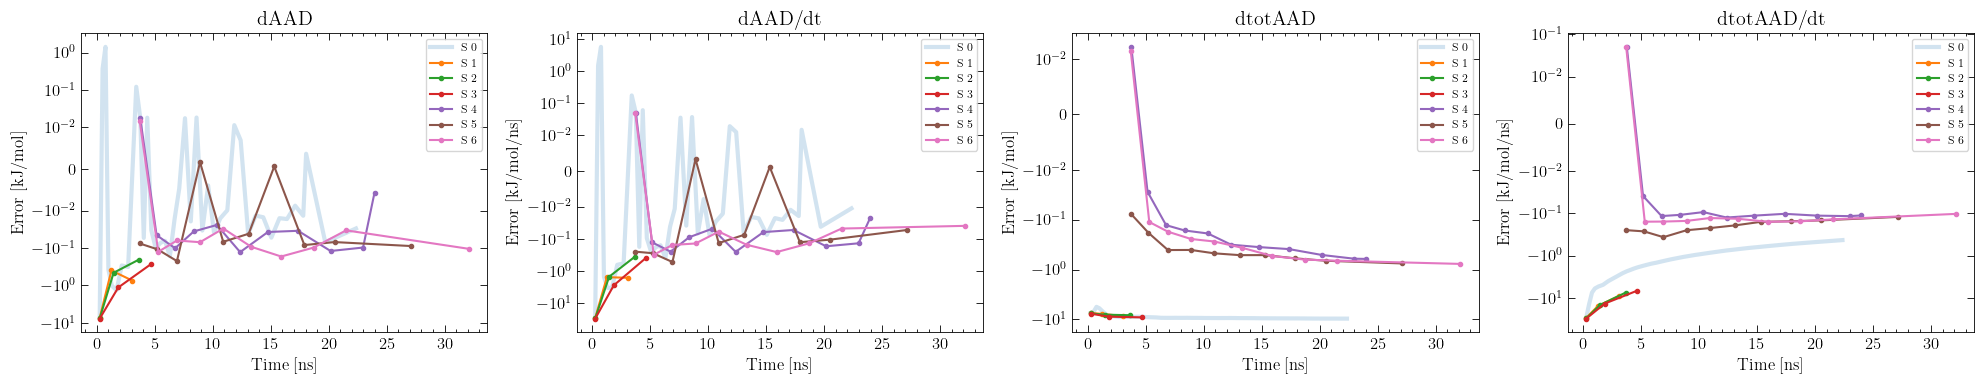

In [ ]:
# plot d_error = dAAD all: ["dAAD", "dAAD/dt", "dtotAAD", "dtotAAD/dt"]
title_list = ["dAAD", "dAAD/dt", "dtotAAD", "dtotAAD/dt"]
y_label_list = ["Error [kJ/mol]", "Error [kJ/mol/ns]", "Error [kJ/mol]", "Error [kJ/mol/ns]"]
plt.figure(figsize=(20,4))

for sim in range(len(mfi_PRTR.sim)):
    
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: print(f"SIM {sim} : len_err={len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0])}"); continue
    
    for err_type in range(4):
        
        plt.subplot(1,4,err_type+1)
        plt.title(title_list[err_type]); plt.xlabel("Time [ns]"); plt.ylabel(y_label_list[err_type])
    
        if sim == 0: plt.plot(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0], np.array(mfi_PRTR.sim[sim].d_AAD)[:, err_type] , label=f"S {sim}", linewidth=3, alpha=0.2)
        else: 
            t = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0]
            t = [t[0] + (t[i] - t[0])*4 for i in range(len(t))]
            plt.plot(t , np.array(mfi_PRTR.sim[sim].d_AAD)[:, err_type] , label=f"S {sim}", marker=".")
            
            plt.yscale("symlog", linthresh=0.01)
 
        plt.legend(fontsize=8)

plt.tight_layout(); plt.show()

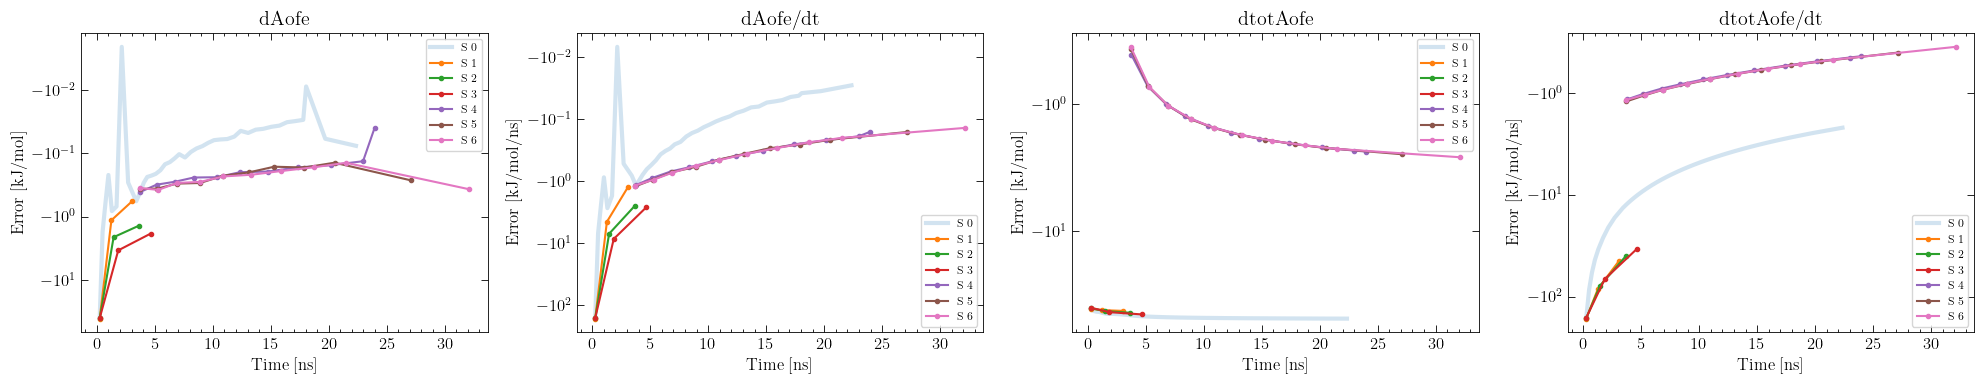

In [ ]:
# plot d_error = dAofe all:["dAofe", "dAofe/dt", "dtotAofe", "dtotAofe/dt"]
title_list = ["dAofe", "dAofe/dt", "dtotAofe", "dtotAofe/dt"]
y_label_list = ["Error [kJ/mol]", "Error [kJ/mol/ns]", "Error [kJ/mol]", "Error [kJ/mol/ns]"]
plt.figure(figsize=(20,4))

for sim in range(len(mfi_PRTR.sim)):
    
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: print(f"SIM {sim} : len_err={len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0])}"); continue

    for err_type in range(4):
        
        plt.subplot(1,4,err_type+1)
        plt.title(title_list[err_type]); plt.xlabel("Time [ns]"); plt.ylabel(y_label_list[err_type])
    
        if sim == 0: plt.plot(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0], np.array(mfi_PRTR.sim[sim].d_Aofe)[:, err_type] , label=f"S {sim}", linewidth=3, alpha=0.2)
        else: 
            t = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0]
            t = [t[0] + (t[i] - t[0])*4 for i in range(len(t))]
            plt.plot(t , np.array(mfi_PRTR.sim[sim].d_Aofe)[:, err_type] , label=f"S {sim}", marker=".")
            
            plt.yscale("symlog", linthresh=0.01)
 
        plt.legend(fontsize=8)

plt.tight_layout(); plt.show()

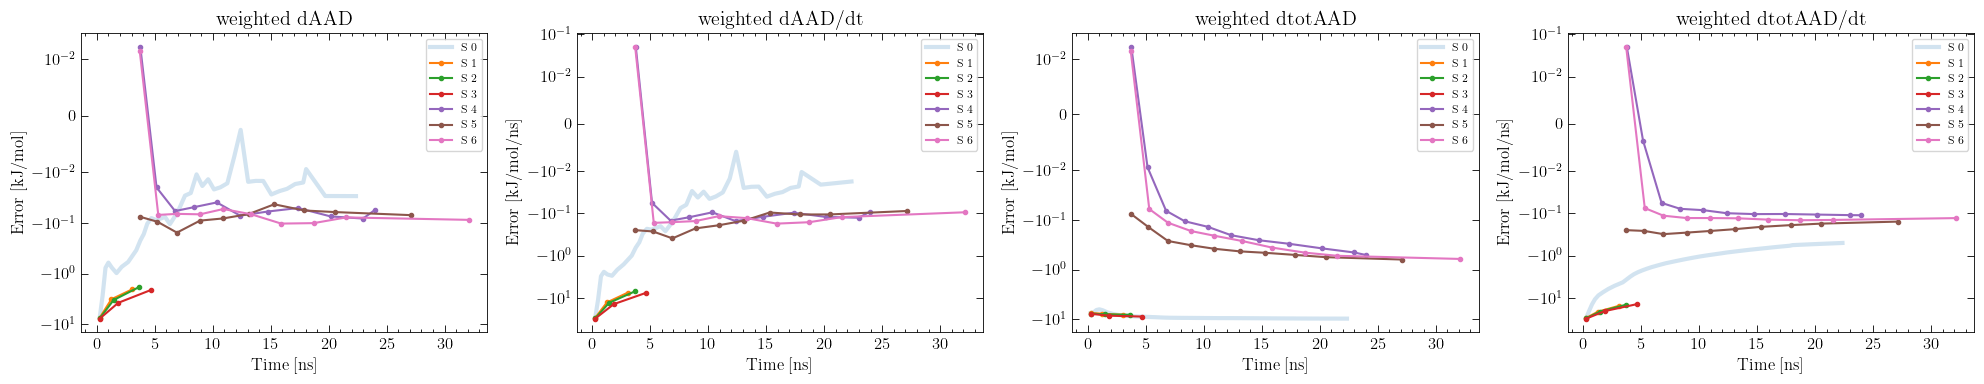

In [ ]:
# plot d_error dAAD_weighted all ["weighted dAAD", "weighted dAAD/dt", "weighted dtotAAD", "weighted dtotAAD/dt"]
title_list = ["weighted dAAD", "weighted dAAD/dt", "weighted dtotAAD", "weighted dtotAAD/dt"]
y_label_list = ["Error [kJ/mol]", "Error [kJ/mol/ns]", "Error [kJ/mol]", "Error [kJ/mol/ns]"]
plt.figure(figsize=(20,4))

for sim in range(len(mfi_PRTR.sim)):
    
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: print(f"SIM {sim} : len_err={len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0])}"); continue

    for err_type in range(4):
        
        plt.subplot(1,4,err_type+1)
        plt.title(title_list[err_type]); plt.xlabel("Time [ns]"); plt.ylabel(y_label_list[err_type])
    
        if sim == 0: plt.plot(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0], np.array(mfi_PRTR.sim[sim].d_AAD_w)[:, err_type], label=f"S {sim}", linewidth=3, alpha=0.2)
        else: 
            t = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0]
            t = [t[0] + (t[i] - t[0])*4 for i in range(len(t))]
            plt.plot(t , np.array(mfi_PRTR.sim[sim].d_AAD_w)[:, err_type] , label=f"S {sim}", marker=".")
            
            # plt.ylim(-1,1)
            plt.yscale("symlog", linthresh=0.01)
 
        plt.legend(fontsize=8)

plt.tight_layout(); plt.show()

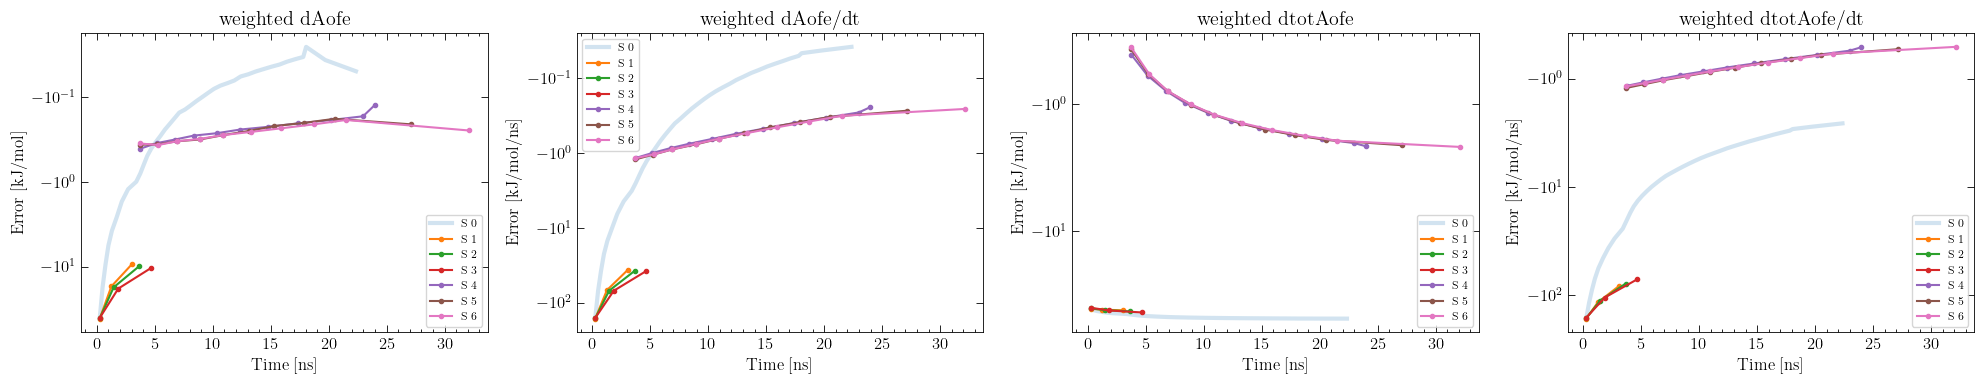

In [ ]:
title_list = ["weighted dAofe", "weighted dAofe/dt", "weighted dtotAofe", "weighted dtotAofe/dt"]
y_label_list = ["Error [kJ/mol]", "Error [kJ/mol/ns]", "Error [kJ/mol]", "Error [kJ/mol/ns]"]
plt.figure(figsize=(20,4))

for sim in range(len(mfi_PRTR.sim)):
    
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: print(f"SIM {sim} : len_err={len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0])}"); continue

    for err_type in range(4):
        
        plt.subplot(1,4,err_type+1)
        plt.title(title_list[err_type]); plt.xlabel("Time [ns]"); plt.ylabel(y_label_list[err_type])
    
        if sim == 0: plt.plot(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0], np.array(mfi_PRTR.sim[sim].d_Aofe_w)[:, err_type] , label=f"S {sim}", linewidth=3, alpha=0.2)
        else: 
            t = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0]
            t = [t[0] + (t[i] - t[0])*4 for i in range(len(t))]
            plt.plot(t , np.array(mfi_PRTR.sim[sim].d_Aofe_w)[:, err_type] , label=f"S {sim}", marker=".")
            
            plt.yscale("symlog", linthresh=0.01)
 
        plt.legend(fontsize=8)

plt.tight_layout(); plt.show()

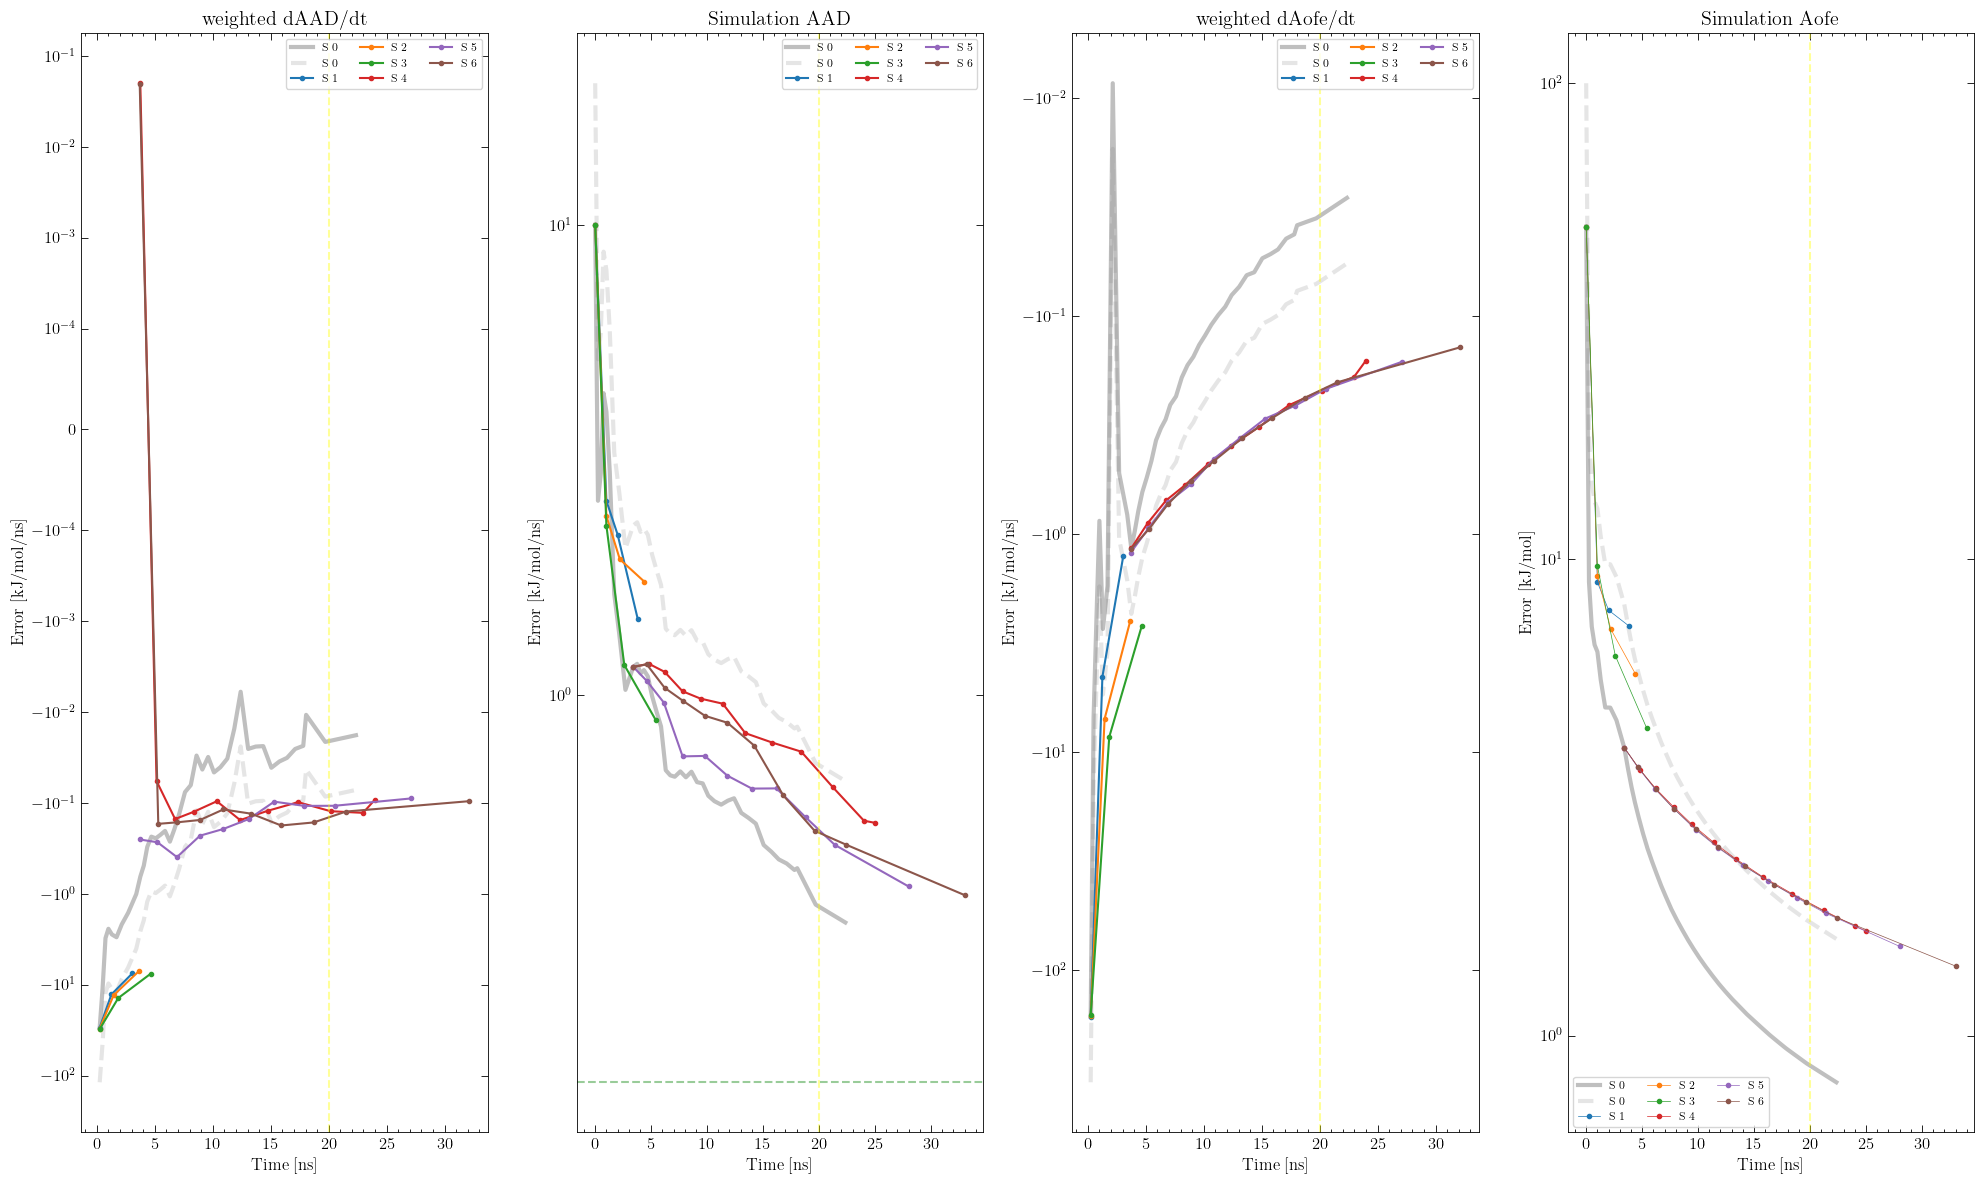

In [ ]:
### Mega plot with [d_AAD_w, AAD, d_Aofe_w, Aofe]

plt.figure(figsize=(20,12))
time_selection = 1 #/4
sim_limit = len(mfi_PRTR.sim)
if time_selection < 1: ts = int(len(mfi_PRTR.sim[0].Avr_Error_list)// (1/time_selection))
else: ts = len(mfi_PRTR.sim[0].Avr_Error_list)
t = np.array(mfi_PRTR.sim[0].Avr_Error_list)[:,0]
t_dt = np.array(mfi_PRTR.sim[0].Avr_Error_list)[1:,0]

plt.subplot(1,4,1)
plt.plot(t_dt[:ts], np.array(mfi_PRTR.sim[0].d_AAD_w)[:, 1][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.5)
plt.plot(t_dt[:ts], 4 * np.array(mfi_PRTR.sim[0].d_AAD_w)[:, 1][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.2, linestyle="--")
for sim in range(1,len(mfi_PRTR.sim))[:sim_limit]:
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: continue
    t_sim = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0];   t_sim = [t_sim[0] + (t_sim[i] - t_sim[0])*4 for i in range(len(t_sim))]
    plt.plot(t_sim , np.array(mfi_PRTR.sim[sim].d_AAD_w)[:, 1] , label=f"S {sim}", marker=".")
    
plt.yscale("symlog", linthresh=0.0001)
plt.axvline(MFI.guaranteed_sim_time*4, color="yellow", linestyle="--", alpha=0.4)
plt.legend(fontsize=8, ncol=3); plt.title("weighted dAAD/dt"); plt.xlabel("Time [ns]"); plt.ylabel("Error [kJ/mol/ns]")


plt.subplot(1,4,2)
plt.plot(t, np.array(mfi_PRTR.sim[0].Avr_Error_list)[:, 3][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.5)
plt.plot(t[:ts], 2 * np.array(mfi_PRTR.sim[0].Avr_Error_list)[:, 3][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.2, linestyle="--")
for sim in range(1,len(mfi_PRTR.sim))[:sim_limit]:
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: continue
    t_sim = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]; t_sim = [t_sim[0] + (t_sim[i] - t_sim[0])*4 for i in range(len(t_sim))]
    plt.plot(t_sim , np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:, 3] , label=f"S {sim}", marker=".")
    
plt.yscale("symlog", linthresh=0.0001)
plt.axvline(MFI.guaranteed_sim_time*4, color="yellow", linestyle="--", alpha=0.4)
plt.axhline(mfi_PRTR.goal, color="green", linestyle="--", alpha=0.4)
plt.legend(fontsize=8, ncol=3); plt.title("Simulation AAD"); plt.xlabel("Time [ns]"); plt.ylabel("Error [kJ/mol/ns]")

plt.subplot(1,4,3)
plt.plot(t_dt[:ts], np.array(mfi_PRTR.sim[0].d_Aofe)[:, 1][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.5)
plt.plot(t_dt[:ts], 2 * np.array(mfi_PRTR.sim[0].d_Aofe)[:, 1][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.2, linestyle="--")
for sim in range(1,len(mfi_PRTR.sim))[:sim_limit]:
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: continue
    t_sim = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0];   t_sim = [t_sim[0] + (t_sim[i] - t_sim[0])*4 for i in range(len(t_sim))]
    plt.plot(t_sim , np.array(mfi_PRTR.sim[sim].d_Aofe)[:, 1] , label=f"S {sim}", marker=".")
        
plt.yscale("symlog", linthresh=0.0001)
plt.axvline(MFI.guaranteed_sim_time*4, color="yellow", linestyle="--", alpha=0.4)
plt.legend(fontsize=8, ncol=3); plt.title("weighted dAofe/dt"); plt.xlabel("Time [ns]"); plt.ylabel("Error [kJ/mol/ns]")


plt.subplot(1,4,4)
plt.plot(t[:ts], np.array(mfi_PRTR.sim[0].Avr_Error_list)[:, 2][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.5)
plt.plot(t[:ts], 2 * np.array(mfi_PRTR.sim[0].Avr_Error_list)[:, 2][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.2, linestyle="--")
for sim in range(1,len(mfi_PRTR.sim))[:sim_limit]:
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: continue
    t_sim = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]; t_sim = [t_sim[0] + (t_sim[i] - t_sim[0])*4 for i in range(len(t_sim))]
    plt.plot(t_sim , np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:, 2] , label=f"S {sim}", marker=".", linewidth=0.5)
    
plt.yscale("symlog", linthresh=0.0001)
plt.axvline(MFI.guaranteed_sim_time*4, color="yellow", linestyle="--", alpha=0.4)
plt.legend(fontsize=8, ncol=3); plt.title("Simulation Aofe"); plt.xlabel("Time [ns]"); plt.ylabel("Error [kJ/mol]")

plt.tight_layout(); plt.show()

## Alanine Dipeptide

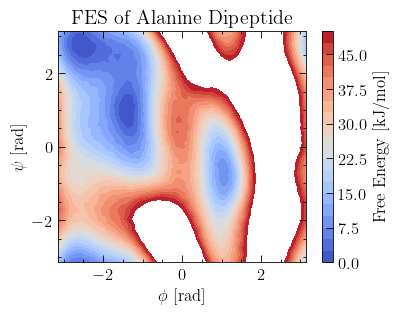

In [6]:
### Define the grid, and load a reference FES
grid = np.linspace(-np.pi, np.pi, 101); 
X, Y = np.meshgrid(grid, grid)
[plX, plY, pl_min, pl_max, pl_n, pl_extra] = lib2.get_plumed_grid_2D(X, Y, periodic=[True, True])

path_AP = path_data + "Alanine_Dipeptide/"
path_input = path_notebook + "/gmx_files/Alanine_Dipeptide/"
plumed_dat_text = f"MOLINFO STRUCTURE={path_input}reference.pdb\nphi: TORSION ATOMS=@phi-2\npsi: TORSION ATOMS=@psi-2\n"

_, _, AP_ref = lib2.load_pkl(path_input + "AP_ref_101x101.pkl")
plt.contourf(X, Y, AP_ref, levels=np.linspace(0, 50, 21), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("$\phi$ [rad]"); plt.ylabel("$\psi$ [rad]"); plt.title("FES of Alanine Dipeptide"); plt.show()

t_compare, v_compare, aofe_compare, aad_compare = lib2.load_pkl(path_input+"AP_10ns_t_v_aofe_aad_prog.pkl")


In [7]:
# default parameters for the MFI class
default_params = {	"X":X, "Y":Y, "Z":AP_ref, "plX":plX, "plY":plY, "periodic":[True, True], "System":"gromacs", "cv_name":["phi","psi"], "plumed_dat_text":plumed_dat_text,
                    "kT":2.49, "time_step":0.001, "position_pace":10, "n_pos_per_window":10, "metad_pace":100, "bw":[0.1, 0.1],
         			"len_error_list":50, "FES_cutoff":50.0, # "record_maps":True, "record_forces_e":True, "calculate_FES_st_dev":True, "bootstrap_iter":50,
                    "simulation_folder_path": path_AP, "save_mfi_instance":True, "save_results":True, "save_force_terms":True, "save_error_progression":True,
				  	
                    "find_sim_init_structure":True, "make_tpr_input_file":True, 
					"trajectory_xtc_file_path_list":[path_input+"traj_0.xtc"], "structure_gro_file_path":path_input+"structure.gro", "mdp_file_path":path_input+"gromppvac.mdp", "top_file_path":path_input+"topology.top", "tpr_file_path":path_input+"input.tpr", "pdb_file_path":path_input+"reference.pdb",
           			}



In [8]:
os.chdir(path_notebook); reload(MFI_class2D); reload(lib2); pass

In [10]:
MFI = MFI_class2D.MFI2D(**default_params)

mfi_PRTR = MFI.MFI_parallel_RTR(parent=MFI, ID="_test2", workers=3, n_cores_per_simulation=1, goal=0.1, main_error_type="AAD", n_pos_before_analysis=1000, guaranteed_sim_time=0.2, max_sim_time=0.5,
                         time_budget=1)
                        #  restart_PRTR=True, time_budget=3.7)
                        
mfi_PRTR.run()

mfi_PRTR.sim[0].plot_results(t_compare=t_compare, aofe_compare=aofe_compare, aad_compare=aad_compare)

print(f"\n~~~~~~ END ~~~~~~\n\n{mfi_PRTR.sim[0].Aofe = :.4f}, {mfi_PRTR.sim[0].AAD = :.4f}")


S 1  START in exploration phase | MetaD_H=19.9 | MetaD_W=[0.100528 0.100528] | BF=50.0 | Startup: 0.55 sec
S 2  START in exploration phase | MetaD_H=19.9 | MetaD_W=[0.12566 0.12566] | BF=50.0 | Startup: 0.54 sec
S 3  START in exploration phase | MetaD_H=19.9 | MetaD_W=[0.150792 0.150792] | BF=50.0 | Startup: 0.57 sec
    S 1 | t= 0.01ns | nPos: 1000/ 1000: Aofe: 37.05 | AAD: 7.97 | Aofe_all: 37.05  |  AAD_all: 7.97 | 
ALL | t= 0.01ns :   ->->->-> Memory: 25.31 MB

    S 2 | t= 0.01ns | nPos: 1000/ 1000: Aofe: 42.85 | AAD: 10.39 | Aofe_all: 37.02  |  AAD_all: 10.44 | 
ALL | t= 0.02ns :   ->->->-> Memory: 27.39 MB

    S 3 | t= 0.01ns | nPos: 1000/ 1000: Aofe: 46.40 | AAD: 10.69 | Aofe_all: 36.54  |  AAD_all: 13.52 | 
ALL | t= 0.03ns :   ->->->-> Memory: 29.48 MB

    S 1 | t= 0.02ns | nPos: 1000/ 2000: Aofe: 29.81 | AAD: 7.28 | Aofe_all: 33.28  |  AAD_all: 10.75 | 
ALL | t= 0.04ns :   ->->->-> Memory: 30.16 MB

    S 2 | t= 0.02ns | nPos: 1000/ 2000: Aofe: 34.10 | AAD: 8.76 | Aofe_all: 

KeyboardInterrupt: 

## Run over night

In [ ]:
# default parameters for the MFI class
default_params = {  "X":X, "Y":Y, "Z":inve_pot, "bw":[0.1, 0.1], "System":"Langevin", "plumed_dat_text":plumed_dat_text, "plX":plX, "plY":plY, 
                    "position_pace":50, "n_pos_per_window":10, "metad_pace":500, "Bias_sf":1, "gaus_filter_sigma":1,
                    "FES_cutoff":FES_cutoff, "calculate_FES_st_dev":True, "bootstrap_iter":30, "simulation_folder_path": path_invernizzi}

PRTR_params = { "workers":3, 
               "goal":0.01, "main_error_type":"AAD", "n_pos_before_analysis":1000, "guaranteed_sim_time":10, "max_sim_time":20, "time_budget":100, "ID":""}               
                  

In [46]:
total_campaigns = 20

for n_campaign in range(1,total_campaigns+1):
        
    campaign_id = f"_{n_campaign}_100ns"
    print(f"\n\n-------- {n_campaign = }, with {campaign_id = }", end=" ")
    
    if os.path.isfile(path_invernizzi+f"PRTRcampaing{campaign_id}/error_progression{campaign_id}.pkl"): print("Results file exists, skipping campaign"); continue
    else: print("--------")
        
    # new_params = {**default_params.copy()}
    # new_params.update({"simulation_folder_path":path_PRTR+f"simulation{campaign_id}/"})    
    MFI = MFI_class2D.MFI2D(**default_params)
    
    mfi_PRTR = MFI.MFI_parallel_RTR(parent=MFI, **PRTR_params)       
    
    mfi_PRTR.run()

    print(f"\n\n~~~~ End of campaign: \nAofe = {mfi_PRTR.sim[0].Aofe:.4f}, AAD = {mfi_PRTR.sim[0].AAD:.4f}")

    lib2.save_pkl([mfi_PRTR.sim[0].force_terms, mfi_PRTR.sim[0].Avr_Error_list], path_PRTR+f"results_20ns{campaign_id}")




n_campaign = 1, with campaign_id = '_inve2_PRTR_1'
Results file exists, skipping campaign


n_campaign = 2, with campaign_id = '_inve2_PRTR_2'
Results file exists, skipping campaign


n_campaign = 3, with campaign_id = '_inve2_PRTR_3'
Results file exists, skipping campaign


n_campaign = 4, with campaign_id = '_inve2_PRTR_4'
Results file exists, skipping campaign


n_campaign = 5, with campaign_id = '_inve2_PRTR_5'
Results file exists, skipping campaign


n_campaign = 6, with campaign_id = '_inve2_PRTR_6'
Results file exists, skipping campaign


n_campaign = 7, with campaign_id = '_inve2_PRTR_7'
Results file exists, skipping campaign


n_campaign = 8, with campaign_id = '_inve2_PRTR_8'
Results file exists, skipping campaign


n_campaign = 9, with campaign_id = '_inve2_PRTR_9'
Results file exists, skipping campaign


n_campaign = 10, with campaign_id = '_inve2_PRTR_10'
Results file exists, skipping campaign


n_campaign = 11, with campaign_id = '_inve2_PRTR_11'
Results file exists, sk